# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('../data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### Preperations

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import export_text
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

from shared_code.utils import *

### Explore the data

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


We can see from the data information. There is no null values in every feature. All the features are float or int type.

transaction_date 
Minimum:2012.67
Mean:2013.14
Median:2013.17
Mode:2013.42
Maximum:2013.58



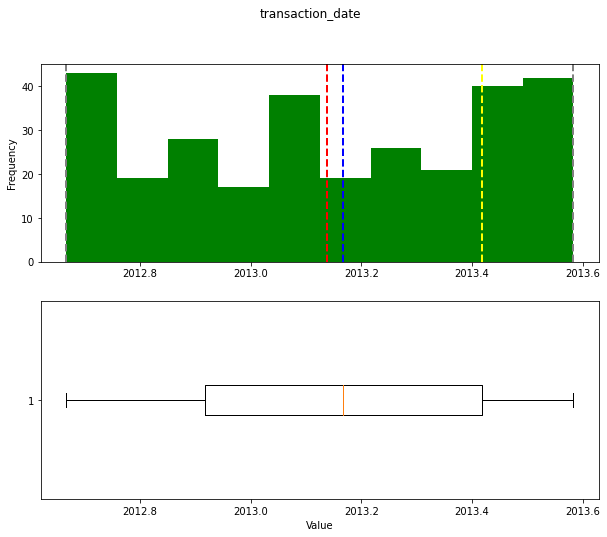

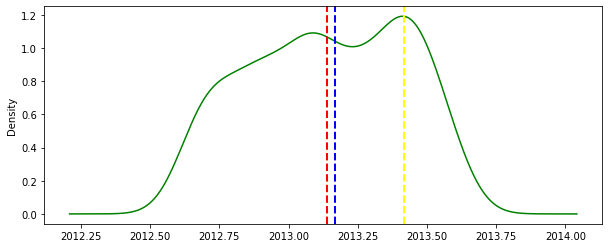

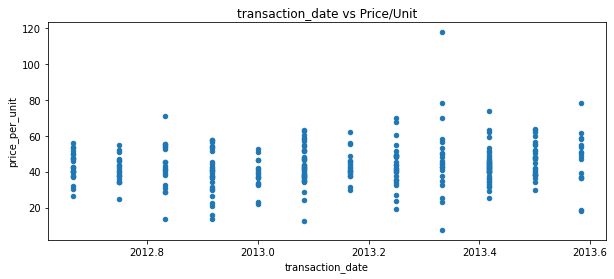

house_age 
Minimum:0.00
Mean:18.51
Median:16.20
Mode:0.00
Maximum:43.80



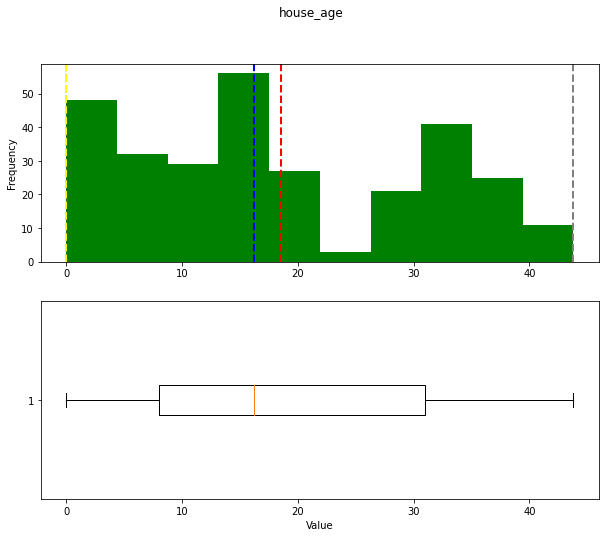

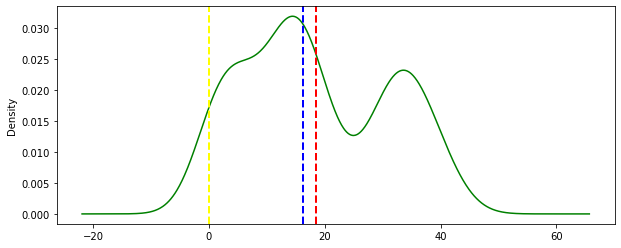

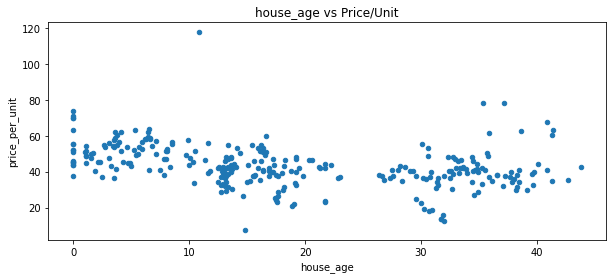

transit_distance 
Minimum:23.38
Mean:421.46
Median:379.56
Mode:289.32
Maximum:1264.73



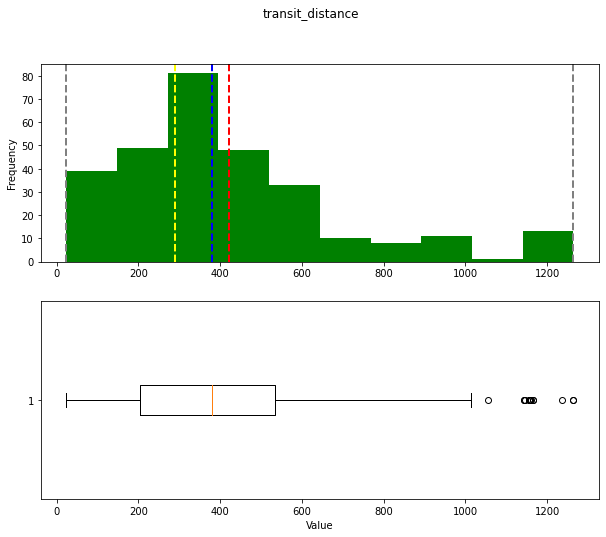

transit_distance 
Minimum:23.38
Mean:348.85
Median:338.97
Mode:289.32
Maximum:804.69



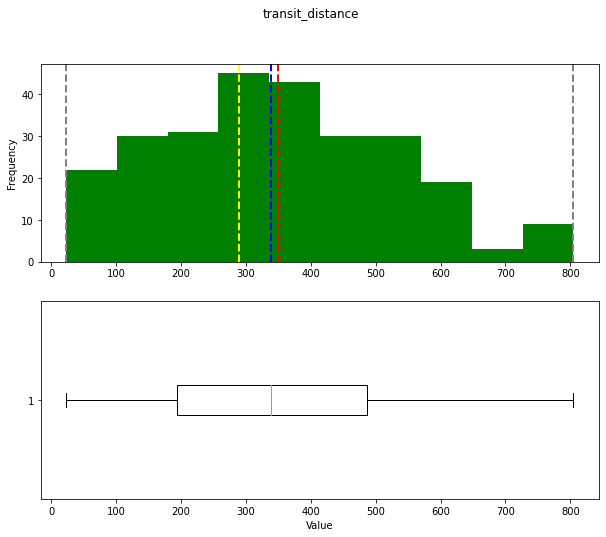

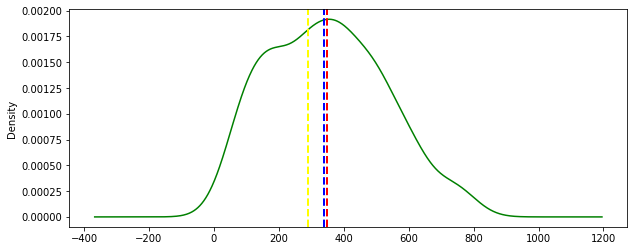

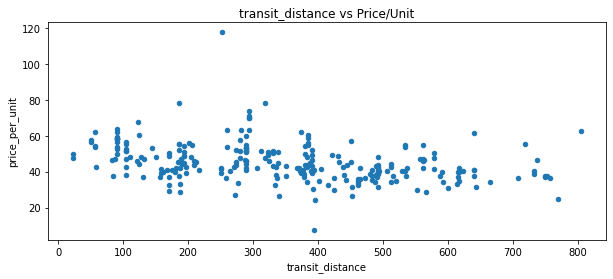

local_convenience_stores 
Minimum:0.00
Mean:5.56
Median:6.00
Mode:5.00
Maximum:10.00



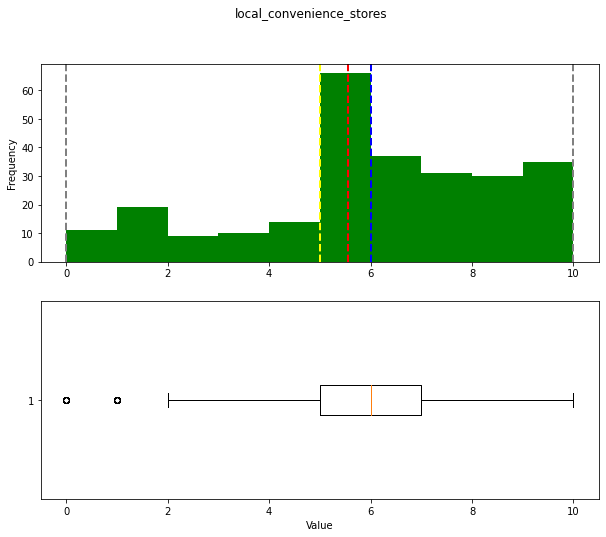

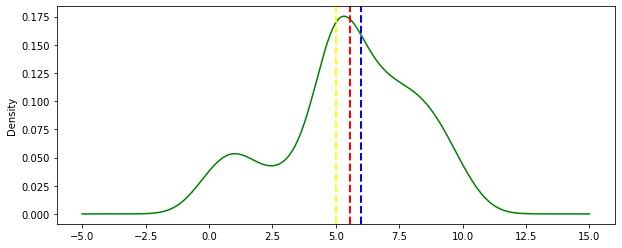

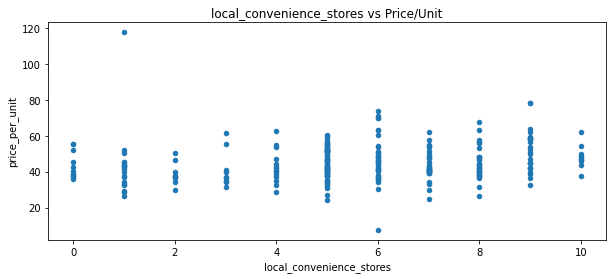

In [8]:
# Explore the data
numeric_features = ['transaction_date', 'house_age', 'transit_distance', 'local_convenience_stores']
for feature in numeric_features:

    # Show the distribution of original data
    show_distribution(data[feature])

    # Trim the outliers of transit_distance
    if feature == 'transit_distance':
        data = trim_outliers_maximum(data, feature, 0.9)

        # Show the distributions without outliers
        show_distribution(data[feature])

    # Show the density function graphic
    show_density(data[feature])

    # Show the scatter plot between each feature and label
    data.plot.scatter(title=feature + ' vs Price/Unit', x=feature, y='price_per_unit', figsize=(10, 4))

    plt.show()

From the visualizations of each feature, transaction date shows no definitely affection on price of every unit. The house
age has no obvious affection on price of house. But it indicates that house between 0 year and 20 years will have a better salse.
However, the 30 years old houses have a not bad sales as well. Regardless of some very far distances, the most of the distance to the
nearest light railway station are less than 600 meters. The most people choose the distance between 300 meters and 400 meters.
The amount of local convenience stores has no 

In [15]:
# Split the training and testing dataset
X = data.iloc[:, :-1]
y = data['price_per_unit']
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Create preprocessing and training model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model with training dataset
model = pipeline.fit(X_train, y_train)

# Get predictions with testing dataset
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('MSE: {}\nRMSE: {}\nR2:{}'.format(mse, rmse, r2))

# Plot the predicted labels and actual labels
fig = plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='green')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Comparison of predicted and actual price/unit')

# Show the graphic
plt.show

ValueError: Found input variables with inconsistent numbers of samples: [289, 125]

In [ ]:
# Identify the hyperparameters

# Fit the training dataset to find the best hyperparameters to get the optimal R2

# Get the best model parameters

# Get predictions with testing dataset

# Evaluate model metrics

# Plot predicted and actual labels

# Overlay the regression line

# Show the graphic

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# Your code to use the trained model